<a href="https://colab.research.google.com/github/jlchulilla/ipympl/blob/master/timelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 50)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#esto es para la prueba inicial, cuando se contaba con una tabla de https://coda.io/d/PP-Comunidad-de-Madrid_d6l4npB9VCk/test-fechas-tags_suV-e#_luQ5z
df = pd.read_csv('/content/drive/My Drive/PPMadrid/test_fechas_timeline.csv',sep='\t')
df2 = df.melt(id_vars=['Fecha'], var_name='Tag', value_name = 'cuenta')
df2['Fecha'] = pd.to_datetime(df2['Fecha'])#,format='%m%d%Y',errors='ignore')
df2.head(10)
#df2.to_csv('/content/drive/My Drive/PPMadrid/fechas_nopivot.csv',sep=',')

,Fecha,Tag,cuenta
0,2020-01-03,Covid-19,0
1,2020-02-03,Covid-19,0
2,2020-03-03,Covid-19,0
3,2020-04-03,Covid-19,0
4,2020-05-03,Covid-19,0
5,2020-06-03,Covid-19,0
6,2020-07-03,Covid-19,0
7,2020-08-03,Covid-19,0
8,2020-09-03,Covid-19,0
9,2020-10-03,Covid-19,0


In [0]:
#esto es para cargar la fetén, creada con el script crea_tabla_tags_fechas_paraaltair.py
#hay que filtrar las etiquetas que queramos
df2 = pd.read_csv('/content/drive/My Drive/PPMadrid/limpio_fechas_tags_comadrid_googlenl.csv')

In [0]:
import altair as alt

import pandas as pd
pd.set_option('display.max_rows', 50)

#esto es para que sólo salga en X las fechas que queremos
rangofechas = ["2020-03-01", "2020-5-31"]

#df2 = pd.read_csv('/content/drive/My Drive/PPMadrid/fechas_nopivot.csv')
line = alt.Chart(df2).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('Fecha:T', axis=alt.Axis(labelAngle=60,format='%d/%m'),
          scale=alt.Scale(domain=rangofechas)),
    alt.Y('Tag:N'),
    alt.Size('cuenta:Q',
        scale=alt.Scale(range=[0,100]),
        legend=alt.Legend(title='Apariciones por día')
    ),
    alt.Color('Tag:N', legend=None)
).properties(
    width=500,
    height=150
)
#nearest = alt.selection(type='single', nearest=True, on='mouseover',fields=['Fecha:O'], empty='none')

rules = alt.Chart(df2).mark_rule(color='lightgray').encode(
    x='Fecha:T',
    y='Tag:N'
)



alt.layer(line).configure_axis(
    labelFontSize=12,
    titleFontSize=14)

NameError: ignored

In [0]:
#@title Fallecimientos por día
#@markdown Para seleccionar los tags a representar, escriba los tags se parados por comas. Ejemplo: `Comunidad de Madrid,COVID-19,Díaz Ayuso,residencias`. 
#@markdown 
#@markdown La  lista disponible es...
#@markdown 
#@markdown pulse Ctrl + Enter para renovar el gráfico

#lista para seleccionar países
df2 = pd.read_csv('/content/drive/My Drive/PPMadrid/limpio_fechas_tags_comadrid_googlenl.csv')
df3 = pd.read_csv('/content/drive/My Drive/PPMadrid/limpio_fechas_tags_comadrid_oandoqda.csv')
filtratags2 = "COVID-19,AULA,violencia de género,discapacidad"  #@param {type: "string"}
listatags2 = filtratags2.split(',')
print(listatags)
filtratags3 = "Covid-19,AULA,Violencia de género,Personas con discapacidad "  #@param {type: "string"}
listatags3 = filtratags3.split(',')


df2 = df2[df2['tag'].isin(listatags2)]
df3 = df3[df3['tag'].isin(listatags3)]
print(df2)

#El fetén
import altair as alt
rangofechas = ["2020-03-01", "2020-5-31"]

#df2 = pd.read_csv('/content/drive/My Drive/PPMadrid/fechas_nopivot.csv')
def base_timeline(df):
  line = alt.Chart(df).mark_circle(
      opacity=0.8,
      stroke='black',
      strokeWidth=1
  ).encode(
      alt.X('fecha:T', axis=alt.Axis(labelAngle=60,format='%d/%m'),
            scale=alt.Scale(domain=rangofechas)),
      alt.Y('tag:N'),
      alt.Size('cuentafecha:Q',
          scale=alt.Scale(range=[0,200]),
          legend=alt.Legend(title='count x day', symbolFillColor = 'red')
      ),
      alt.Color('tag:N', legend=None)
  ).properties(
      width=700,
      height=150
  )
  #nearest = alt.selection(type='single', nearest=True, on='mouseover',fields=['Fecha:O'], empty='none')

  rules = alt.Chart(df2).mark_rule(color='lightgray').encode(
      x='Fecha:T',
      y='Tag:N'
  )
  return line


line2 = base_timeline(df2)
alt.layer(line).configure_axis(
  labelFontSize=12,
  titleFontSize=14
  ).properties(
  title='Named Entity Recognized Timeline'
).configure_title(
  fontSize=20,
  color='gray',
  dy =-10
).interactive()

line3 = base_timeline(df3)
alt.vconcat(line2,line3).configure_axis(
  labelFontSize=12,
  titleFontSize=14
  ).properties(
  title='Qualitative Entities and Machine Learning Entities Timeline'
).configure_title(
  fontSize=20,
  color='gray',
  dy =-10
)


  








FileNotFoundError: ignored

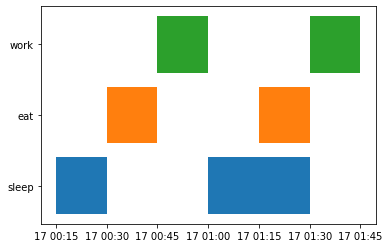

In [0]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

data = [    (dt.datetime(2018, 7, 17, 0, 15), dt.datetime(2018, 7, 17, 0, 30), 'sleep'),
            (dt.datetime(2018, 7, 17, 0, 30), dt.datetime(2018, 7, 17, 0, 45), 'eat'),
            (dt.datetime(2018, 7, 17, 0, 45), dt.datetime(2018, 7, 17, 1, 0), 'work'),
            (dt.datetime(2018, 7, 17, 1, 0), dt.datetime(2018, 7, 17, 1, 30), 'sleep'),
            (dt.datetime(2018, 7, 17, 1, 15), dt.datetime(2018, 7, 17, 1, 30), 'eat'), 
            (dt.datetime(2018, 7, 17, 1, 30), dt.datetime(2018, 7, 17, 1, 45), 'work')
        ]

cats = {"sleep" : 1, "eat" : 2, "work" : 3}
colormapping = {"sleep" : "C0", "eat" : "C1", "work" : "C2"}

verts = []
colors = []
for d in data:
    v =  [(mdates.date2num(d[0]), cats[d[2]]-.4),
          (mdates.date2num(d[0]), cats[d[2]]+.4),
          (mdates.date2num(d[1]), cats[d[2]]+.4),
          (mdates.date2num(d[1]), cats[d[2]]-.4),
          (mdates.date2num(d[0]), cats[d[2]]-.4)]
    verts.append(v)
    colors.append(colormapping[d[2]])

bars = PolyCollection(verts, facecolors=colors)

fig, ax = plt.subplots()
ax.add_collection(bars)
ax.autoscale()
loc = mdates.MinuteLocator(byminute=[0,15,30,45])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

ax.set_yticks([1,2,3])
ax.set_yticklabels(["sleep", "eat", "work"])
plt.show()

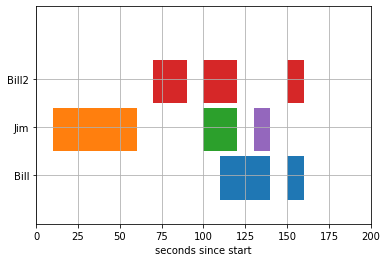

In [0]:
fig, ax = plt.subplots()
ax.broken_barh([(70, 20), (100,20), (150, 10)], (30, 9), facecolors='tab:red')
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:purple'))

ax.set_ylim(5, 50)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25, 35])
ax.set_yticklabels(['Bill', 'Jim', 'Bill2'])
ax.grid(True)


plt.show()